In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC


# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state=7)

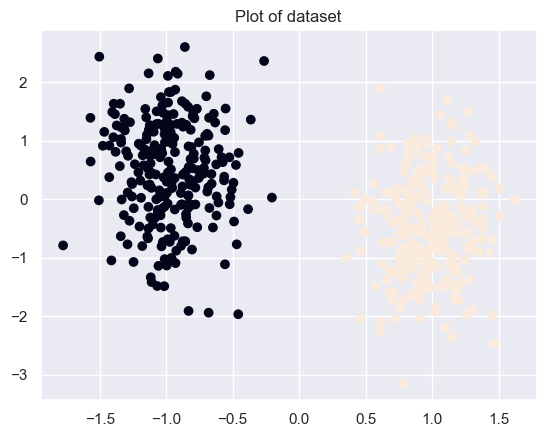

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

In [5]:
from sklearn.decomposition import PCA
from tqdm import tqdm
k = 30
max_accuracy = 0
max_acc_index = 0
for n in tqdm(range(1, k+1)):
    pc_list = [f'pc{i}' for i in range(n)]
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = pc_list)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # "Linear Support vector classifier"
    model = SVC(kernel='linear', C=1E10)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred)

    acc = metrics.accuracy_score(Y_test, Y_pred)
    if acc > max_accuracy:
        max_accuracy = acc
        max_acc_index = n
    # print(f'{n} PC:', acc)
    print(metrics.classification_report(Y_test, Y_pred))
print(f'{max_acc_index}: {max_accuracy}')

  3%|▎         | 1/30 [01:36<46:52, 97.00s/it]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.97      0.80      0.88        40

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



  7%|▋         | 2/30 [03:23<47:57, 102.77s/it]

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        74
           1       0.94      0.82      0.88        40

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



 10%|█         | 3/30 [07:05<1:10:44, 157.20s/it]

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        74
           1       1.00      0.80      0.89        40

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



In [ ]:
from sklearn.decomposition import PCA
max_acc_index = 22
pca = PCA(n_components=max_acc_index)
principalComponents = pca.fit_transform(X)
pc_list = [f'pc{i}' for i in range(max_acc_index)]
principalDf = pd.DataFrame(data = principalComponents, columns=pc_list)
# print(principalDf.head())

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Creating a classifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
classifier = Perceptron(max_iter=100, eta0=0.1, random_state=0)
#eta0: Constant by which the updates are multiplied.#eta0double, default=1

classifier.fit(X_train, Y_train) #Training the model using classifier
#Getting cross validation score to predict the model accuracy
scores = cross_val_score(classifier, X_train, Y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9495 (+/- 0.0513)


In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=Y_train, s=30)
ax = plt.gca()
plt.title("Plot of decision boundary on training split")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim)
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
linestyles=['-'])

TypeError: scatter() got multiple values for argument 's'